<a href="https://colab.research.google.com/github/MoriartyKang/DL/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [ ]:
#필요한 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import numpy as np

### 2. 데이터 준비

In [ ]:
!git clone https://github.com/taehojo/data.git #환자 정보 데이터 구글코랩에 저장

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",") #CSV 데이터 파일 불러오기

# X = Data_set[:,0:16] #환자의 상태 기록 X
# y = Data_set[:,16] #수술 1년후 사망/생존 여부 Y
X = Data_set[:,0:16]
Y = Data_set[:,16]


train_input, test_input, train_target, test_target = train_test_split(X, Y, random_state=42)

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 4.20 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
# 데이터 배열 변환
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [ ]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

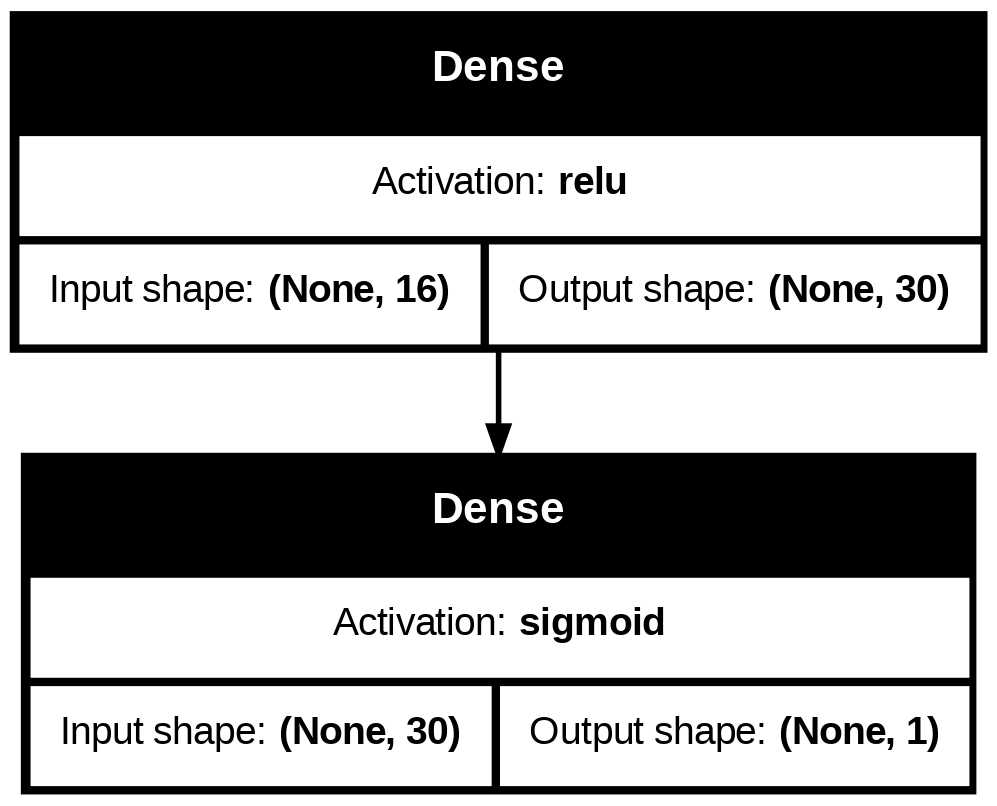

In [20]:
#딥러닝 모델의 구조 결정
# model = Sequential([
#  Input(shape=(16,))
# 완전 연결층 입력층 + 은닉층 역활
#  ,Dense(30, activation='relu')
#  ,Dense(1, activation= 'sigmoid')
# ])
model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True, show_layer_activations=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

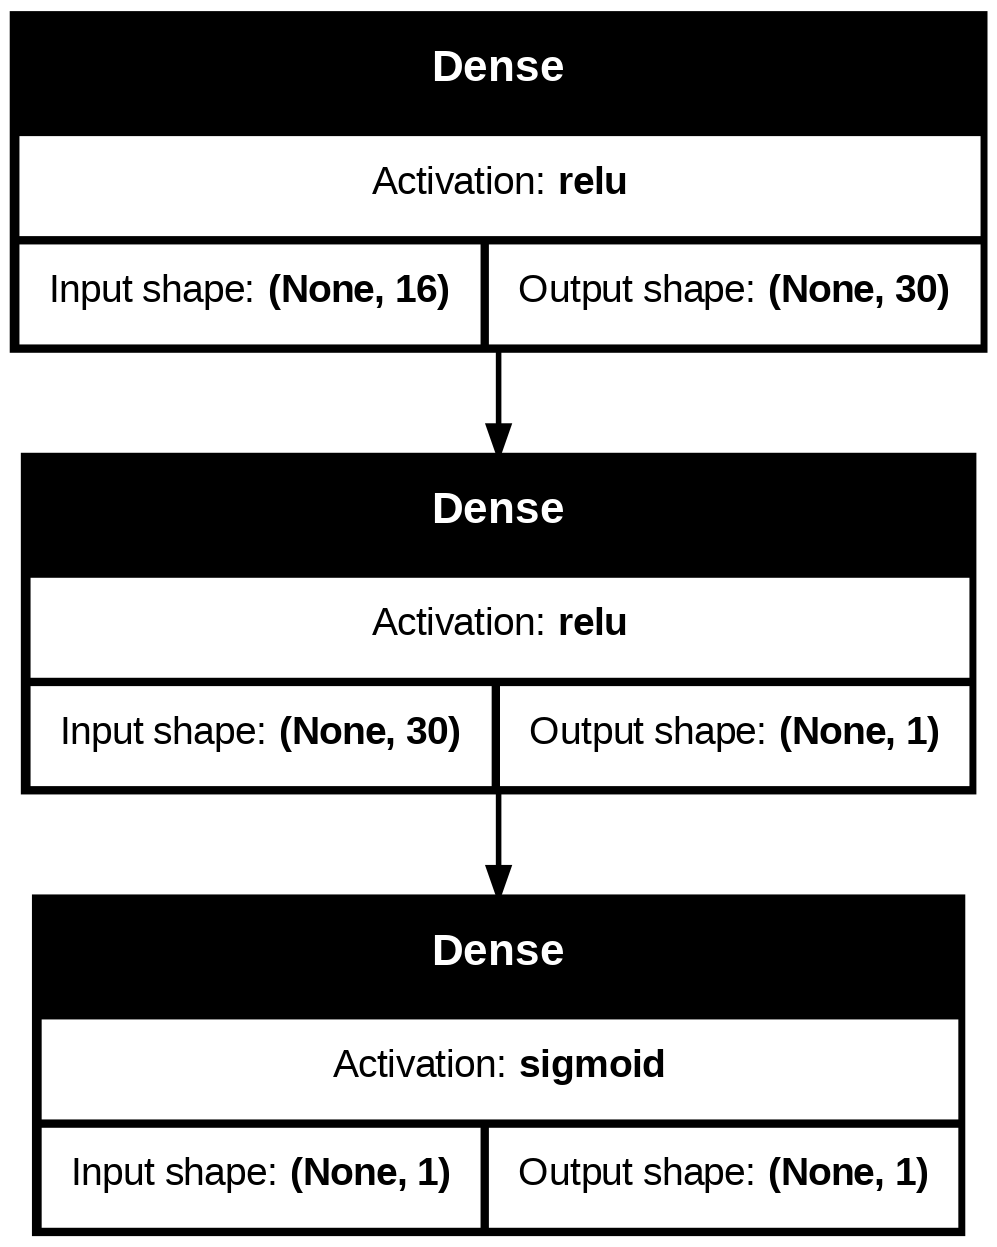

In [21]:
model2 = Sequential()
model2.add(Input(shape=(16,)))
model2.add(Dense(30,input_dim=64, activation='relu'))
model2.add(Dense(1, input_dim=32 ,activation= 'relu'))
model2.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model2,show_shapes=True, show_layer_activations=True)

### 4. 모델 실행

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, Y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8086 - loss: 0.9452
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8281 - loss: 0.5138
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.4789
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.4471
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 0.4923


In [ ]:
history.history

{'accuracy': [0.7063829898834229,
  0.8127659559249878,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091],
 'loss': [0.7615596055984497,
  0.5145598649978638,
  0.48269638419151306,
  0.4748469889163971,
  0.4869018495082855]}

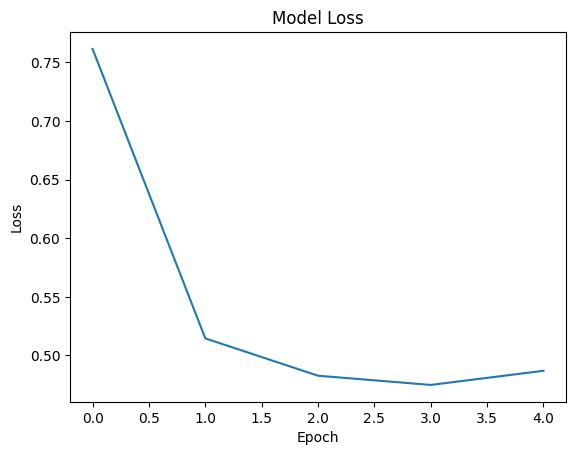

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch') # X값
plt.ylabel('Loss') # Y값
plt.title('Model Loss') # 타이틀
plt.show()

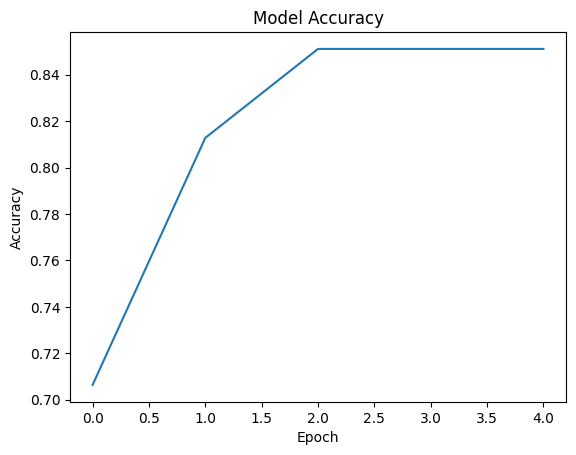

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_input,test_target)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}") #정확도 값

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7991 - loss: 0.5366
Test Loss: 0.5235
Test Accuracy: 0.8051
